# Part 1: SVMの原理
まずは、SVMのおおまかな原理を掴んでいきましょう。

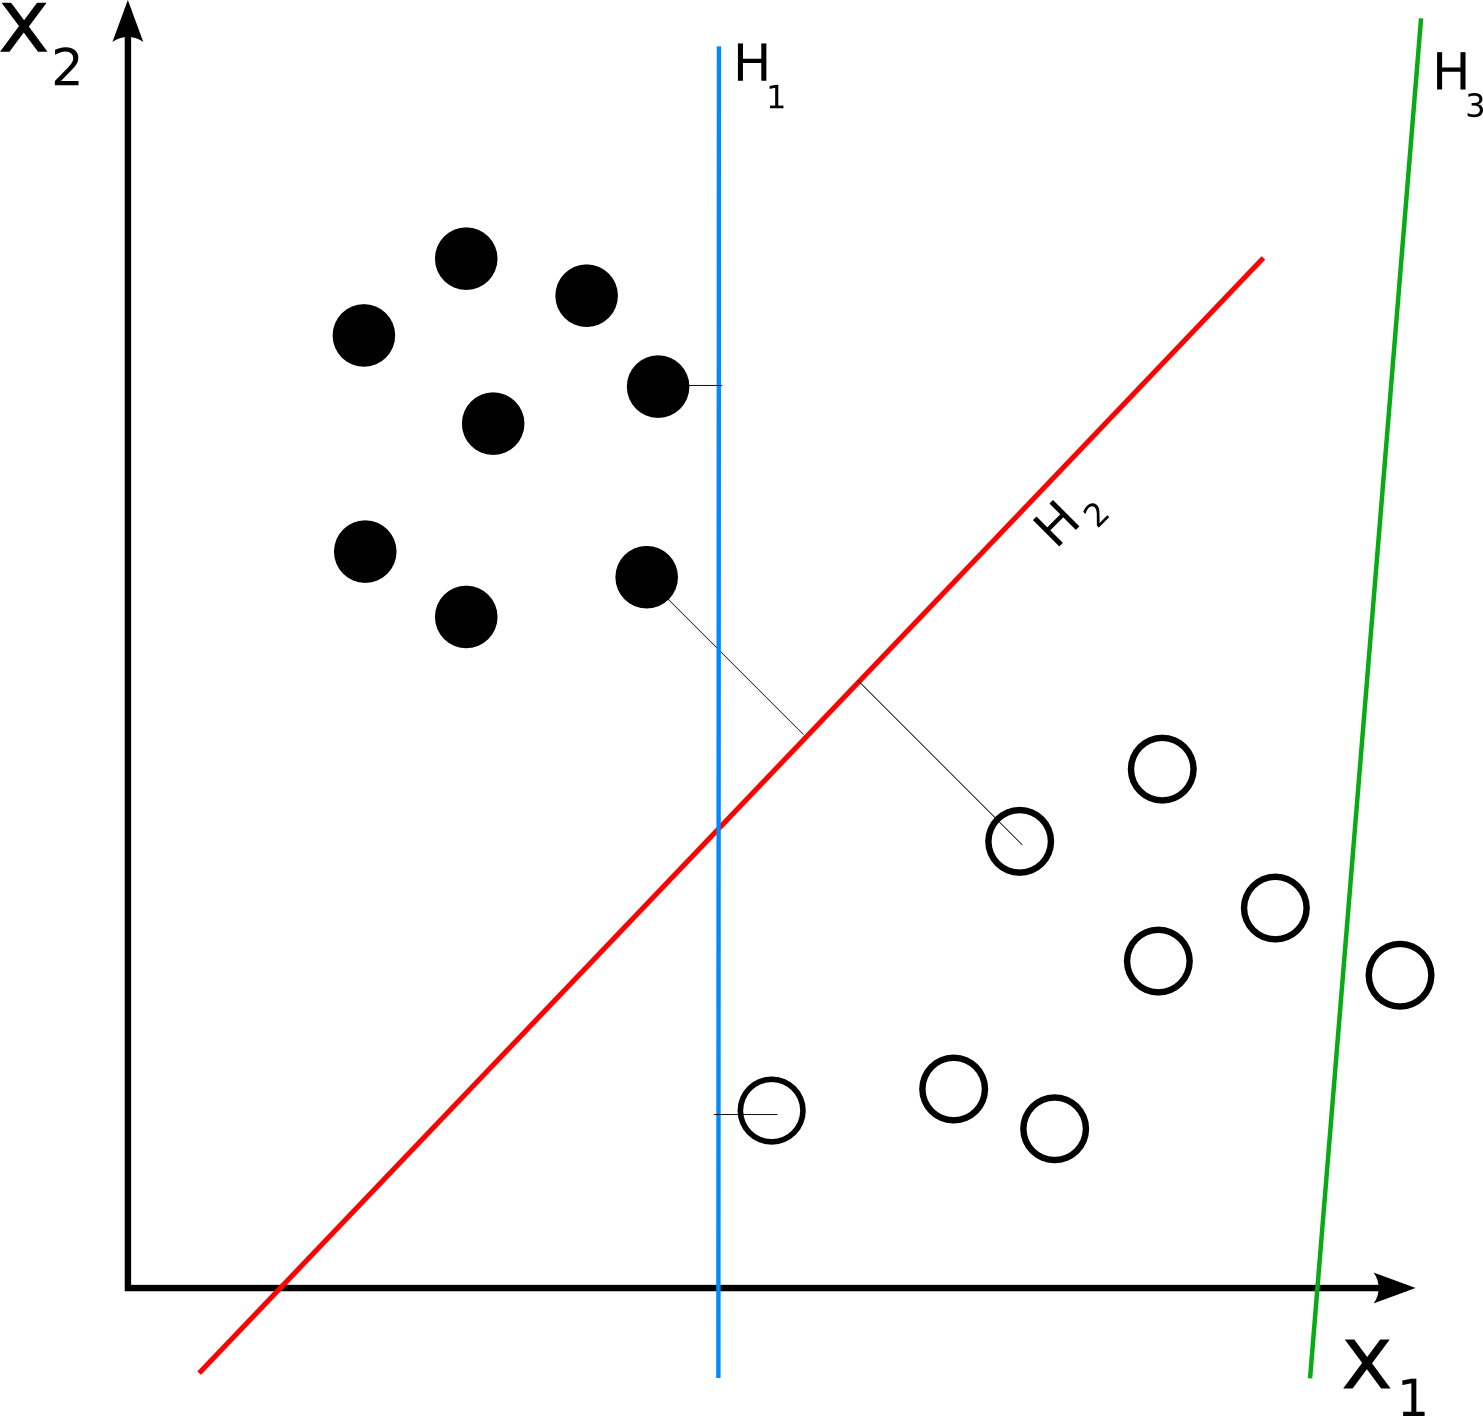

In [1]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url, width=450)

# Part 2: カーネル法
いつも超平面で分離できるとは限りません。そんな時、役に立つのがカーネル法と呼ばれる、工夫です。

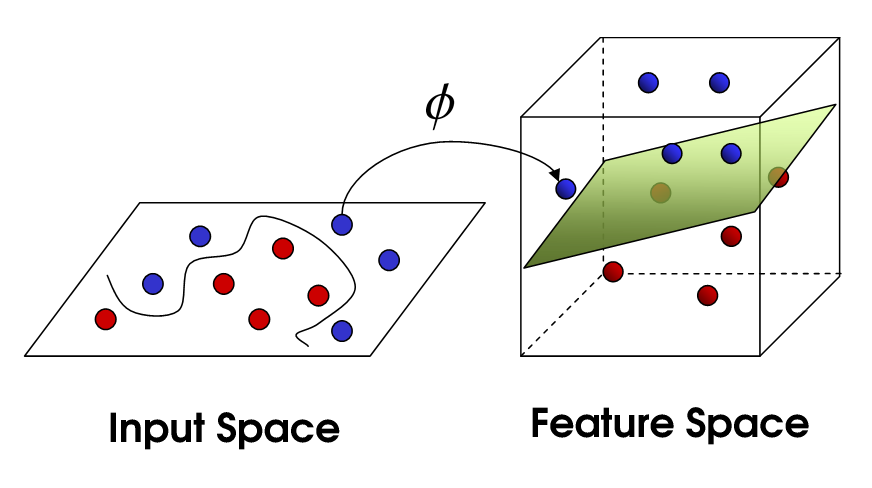

In [2]:
# 特徴量空間におけるカーネルトリック
url='http://i.imgur.com/WuxyO.png'
Image(url)

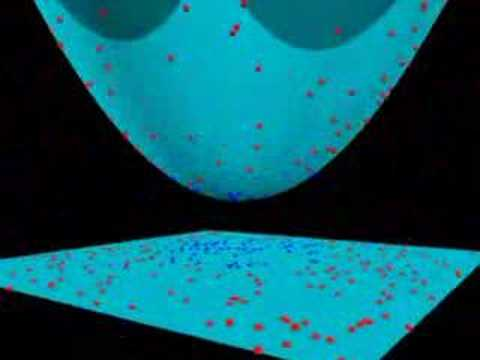

In [3]:
# カーネル法がよく分かる動画です。
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

# Part 3: その他の資料
英語になってしまいますが、その他の資料を挙げておきます。

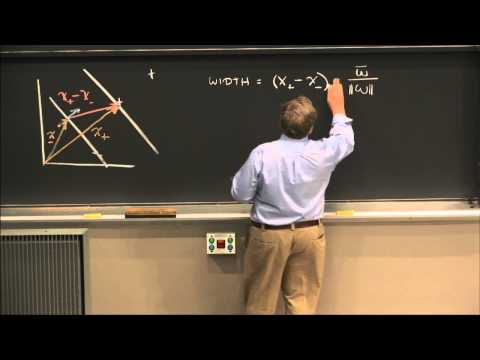

In [4]:
# MITの講義
YouTubeVideo('_PwhiWxHK8o')

# Part 4: scikit-learnを使ったSVMの実際

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [7]:
X = iris.data

In [8]:
Y = iris.target

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,random_state =0)

In [14]:
model.fit(X_train,Y_train)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
predicted = model.predict(X_test)

In [16]:
predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [17]:
from sklearn import metrics

In [18]:
expected = Y_test

In [19]:
print(metrics.accuracy_score(expected,predicted))

0.9736842105263158


非常に高い予測精度が得られました。

デフォルトでは、RBFカーネルが使われています。

それぞれのカーネルの違いをscikit-learnのドキュメントに詳しく載っています。

これを自分で作る方法を書いておきますので、興味がある方はやってみてください。

In [4]:
from sklearn import svm

#図示できるのが二次元までなので、変数を２つに絞ります。
X = iris.data[:,:2]
Y = iris.target

In [6]:
#SVMの正則化パラメータ
C = 1.0

In [8]:
#SVC with a Liner Kernel
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

In [9]:
# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [10]:
# SVC with 3rd degree polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
# step size
h = 0.02

# X軸の最大最小
x_min = X[:,0].min() - 1
x_max = X[:,0].max() +1

#　Y軸の最大最小
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

#meshgridを作ります。
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [13]:
titles = ['SVC with linear kernel',
         'LinearSVC(linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial(degree 3) kernel']

/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/Users/tokoshige_mac/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


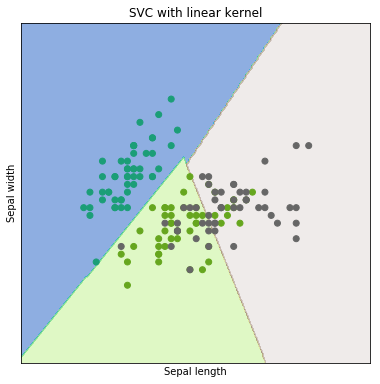

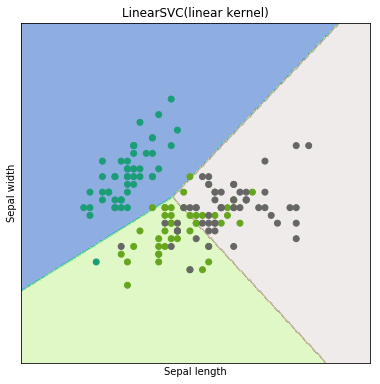

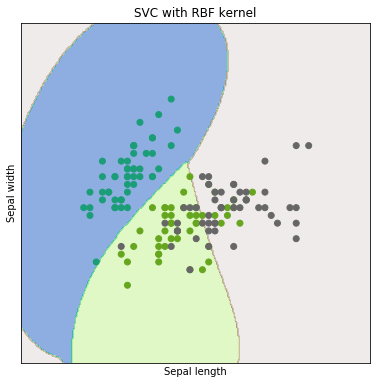

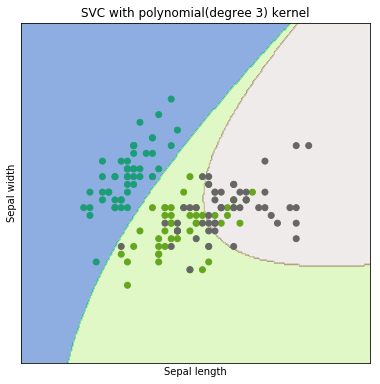

In [16]:
for i, clf in enumerate((svc, lin_svc, rbf_svc,poly_svc)):
    
    #境界線を描画します
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()